# **Day 4/5**: Python Training

The objective of this notebook is to cover some important concepts which we came across during our day 4 of the python training session. In this notebook, we will quickly cover few important concepts mostly around the 4 mostly used modules for data science related projects in python namely - pandas, numpy, matplotlib, plotly

Refer to the outline of this notebook below to browse through different sections of this notebook.  

## **Table of Contents**  
* [Pandas](#pandas)  
    * [Installation](#installation)  
    * [Usage](#usage)  
* [Numpy](#numpy)  
    * [Installation](#installation)  
    * [Usage](#usage)  
* [Matplotlib](#matplotlib)
    * [Installation](#installation)  
    * [Usage](#usage)
* [Plotly](#plotly)
    * [Installation](#installation)  
    * [Usage](#usage)

## **Pandas**

[Back to contents](#table-of-contents)

### Installation

In [1]:
!pip install pandas==1.5.3


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### Usage  

10 minutes to Pandas Official Link - [Link](https://pandas.pydata.org/pandas-docs/version/1.4/pandas.pdf)  
Pandas Cookbook - [Link](https://pandas.pydata.org/pandas-docs/version/1.4/pandas.pdf#page=1001&zoom=100,96,657)

#### Object Creation  

In [2]:
import pandas as pd
import numpy as np

In [3]:
"""
Pandas have 2 data structures - 1. Series, and 2. Dataframes
Series are 1 dimensional datastruture capable of holding any data type (integers, strings, floats, etc)
Dataframes are 2 dimensional datastructure with columns of potentially different data types or dict of Series objects.
"""
 
# Series
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [4]:
dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [5]:
# Dataframe with same data type
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,-0.324955,0.831472,1.254950,1.048491
2013-01-02,-0.167466,1.058916,-0.921668,-0.218421
2013-01-03,-0.803256,1.076439,0.168481,1.685654
2013-01-04,-0.236479,1.456033,1.117875,1.223213
2013-01-05,-0.420329,1.125849,0.119555,1.850441
2013-01-06,-1.205148,0.517894,0.582772,0.040019


In [6]:
# Dataframe with different data types
df2 = pd.DataFrame(
    {
    "A": 1.0,
    "B": pd.Timestamp("20130102"),
    "C": pd.Series(1, index=list(range(4)), dtype="float32"),
    "D": np.array([3] * 4, dtype="int32"),
    "E": pd.Categorical(["test", "train", "test", "train"]),
    "F": "foo",
    }
)
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [7]:
# Extracting data types for each column of dataframe
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

#### Viewing Data

In [8]:
# Viewing first 5 rows of the dataframe
df.head()

,A,B,C,D
2013-01-01,-0.324955,0.831472,1.254950,1.048491
2013-01-02,-0.167466,1.058916,-0.921668,-0.218421
2013-01-03,-0.803256,1.076439,0.168481,1.685654
2013-01-04,-0.236479,1.456033,1.117875,1.223213
2013-01-05,-0.420329,1.125849,0.119555,1.850441


In [9]:
# Viewing last 5 rows of the dataframe
df.tail()

,A,B,C,D
2013-01-02,-0.167466,1.058916,-0.921668,-0.218421
2013-01-03,-0.803256,1.076439,0.168481,1.685654
2013-01-04,-0.236479,1.456033,1.117875,1.223213
2013-01-05,-0.420329,1.125849,0.119555,1.850441
2013-01-06,-1.205148,0.517894,0.582772,0.040019


In [10]:
# Viewing indexes for the dataframe
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [11]:
# Viewing columns of the dataframe
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [12]:
# Converting dataframe to numpy array
df.to_numpy()

array([[-0.32495544,  0.83147242,  1.25494992,  1.0484908 ],
       [-0.16746619,  1.05891582, -0.92166753, -0.21842119],
       [-0.8032558 ,  1.07643944,  0.16848085,  1.68565379],
       [-0.23647874,  1.45603281,  1.11787483,  1.22321289],
       [-0.42032926,  1.12584857,  0.11955547,  1.85044112],
       [-1.20514817,  0.51789432,  0.58277242,  0.04001894]])

In [13]:
# Extracting Statistics for each column of the dataframe
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.526272,1.011101,0.386994,0.938233
std,0.400516,0.314072,0.794699,0.851912
min,-1.205148,0.517894,-0.921668,-0.218421
25%,-0.707524,0.888333,0.131787,0.292137
50%,-0.372642,1.067678,0.375627,1.135852
75%,-0.258598,1.113496,0.984099,1.570044
max,-0.167466,1.456033,1.254950,1.850441


In [14]:
# Transposing a dataframe
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.324955,-0.167466,-0.803256,-0.236479,-0.420329,-1.205148
B,0.831472,1.058916,1.076439,1.456033,1.125849,0.517894
C,1.254950,-0.921668,0.168481,1.117875,0.119555,0.582772
D,1.048491,-0.218421,1.685654,1.223213,1.850441,0.040019


In [15]:
# Sorting a dataframe by index values
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,1.048491,1.254950,0.831472,-0.324955
2013-01-02,-0.218421,-0.921668,1.058916,-0.167466
2013-01-03,1.685654,0.168481,1.076439,-0.803256
2013-01-04,1.223213,1.117875,1.456033,-0.236479
2013-01-05,1.850441,0.119555,1.125849,-0.420329
2013-01-06,0.040019,0.582772,0.517894,-1.205148


In [16]:
# Sorting a dataframe by column values
df.sort_values(by="B")

,A,B,C,D
2013-01-06,-1.205148,0.517894,0.582772,0.040019
2013-01-01,-0.324955,0.831472,1.254950,1.048491
2013-01-02,-0.167466,1.058916,-0.921668,-0.218421
2013-01-03,-0.803256,1.076439,0.168481,1.685654
2013-01-05,-0.420329,1.125849,0.119555,1.850441
2013-01-04,-0.236479,1.456033,1.117875,1.223213


#### Selection

In [17]:
# Selecting a specific column by label name
df['A']

2013-01-01   -0.324955
2013-01-02   -0.167466
2013-01-03   -0.803256
2013-01-04   -0.236479
2013-01-05   -0.420329
2013-01-06   -1.205148
Freq: D, Name: A, dtype: float64

In [18]:
# Selecting dataframe rows by indexes
df[3:5]

,A,B,C,D
2013-01-04,-0.236479,1.456033,1.117875,1.223213
2013-01-05,-0.420329,1.125849,0.119555,1.850441


In [19]:
# Selecting dataframe rows by index value
df.loc[dates[0]]

A   -0.324955
B    0.831472
C    1.254950
D    1.048491
Name: 2013-01-01 00:00:00, dtype: float64

In [20]:
# Selecting dataframe rows by row and column indices
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-0.236479,1.456033
2013-01-05,-0.420329,1.125849


In [21]:
# Selecting dataframe rows by row and column indices in list format
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-0.167466,-0.921668
2013-01-03,-0.803256,0.168481
2013-01-05,-0.420329,0.119555


In [22]:
# Selecting a specific cell value
df.iloc[1, 1]

1.0589158233394194

In [23]:
# Selecting dataframe rows by boolean / conditional indexing
df[df["A"] > 0]

,A,B,C,D


In [24]:
# Selecting dataframe values which are greater than zero and eliminating others by replacing
# them with NaN values
df[df > 0]

,A,B,C,D
2013-01-01,NaN,0.831472,1.254950,1.048491
2013-01-02,NaN,1.058916,NaN,NaN
2013-01-03,NaN,1.076439,0.168481,1.685654
2013-01-04,NaN,1.456033,1.117875,1.223213
2013-01-05,NaN,1.125849,0.119555,1.850441
2013-01-06,NaN,0.517894,0.582772,0.040019


In [25]:
# Selecting specific dataframe rows by specific column values
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,-0.803256,1.076439,0.168481,1.685654,two
2013-01-05,-0.420329,1.125849,0.119555,1.850441,four


#### Missing Data

In [26]:
# Adding one extra column with NaN values
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1

,A,B,C,D,E
2013-01-01,-0.324955,0.831472,1.254950,1.048491,NaN
2013-01-02,-0.167466,1.058916,-0.921668,-0.218421,NaN
2013-01-03,-0.803256,1.076439,0.168481,1.685654,NaN
2013-01-04,-0.236479,1.456033,1.117875,1.223213,NaN


In [27]:
# Replacing two row indices for new column with some value
df1.loc[dates[0] : dates[1], "E"] = 1
df1

,A,B,C,D,E
2013-01-01,-0.324955,0.831472,1.254950,1.048491,1.0
2013-01-02,-0.167466,1.058916,-0.921668,-0.218421,1.0
2013-01-03,-0.803256,1.076439,0.168481,1.685654,NaN
2013-01-04,-0.236479,1.456033,1.117875,1.223213,NaN


In [28]:
# Dropping dataframe rows with NaN values in E column
df1.dropna(how="any")

,A,B,C,D,E
2013-01-01,-0.324955,0.831472,1.254950,1.048491,1.0
2013-01-02,-0.167466,1.058916,-0.921668,-0.218421,1.0


In [29]:
# Filling NaN values with 5 value for E column
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,-0.324955,0.831472,1.254950,1.048491,1.0
2013-01-02,-0.167466,1.058916,-0.921668,-0.218421,1.0
2013-01-03,-0.803256,1.076439,0.168481,1.685654,5.0
2013-01-04,-0.236479,1.456033,1.117875,1.223213,5.0


In [30]:
# Getting positions in dataframe have values == NaN
pd.isna(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


#### Operations

In [31]:
# Extracting mean values for all columns in the dataframe
df.mean()

A   -0.526272
B    1.011101
C    0.386994
D    0.938233
dtype: float64

In [32]:
# Squaring one specific column of dataframe using lambda function 
df['C_squared'] = df['C'].apply(lambda x: x*x)
df

,A,B,C,D,C_squared
2013-01-01,-0.324955,0.831472,1.254950,1.048491,1.574899
2013-01-02,-0.167466,1.058916,-0.921668,-0.218421,0.849471
2013-01-03,-0.803256,1.076439,0.168481,1.685654,0.028386
2013-01-04,-0.236479,1.456033,1.117875,1.223213,1.249644
2013-01-05,-0.420329,1.125849,0.119555,1.850441,0.014294
2013-01-06,-1.205148,0.517894,0.582772,0.040019,0.339624


In [33]:
# Creating pandas series with string data types
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [34]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

#### Merge

In [35]:
# Generating pandas dataframe for breaking down into fragments
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.444428,-0.050496,-1.239566,0.476590
1,-0.761937,-0.553275,0.817865,1.121689
2,0.035054,-0.071104,-0.679382,0.538226
3,-0.054251,0.346866,0.512642,0.338212
4,-1.039406,0.965039,-0.597305,-0.359024
5,-0.710168,-1.552107,0.291728,0.349185
6,-0.649261,-0.378170,-0.747246,1.295237
7,-0.991060,0.632707,-0.488793,1.395469
8,0.703428,-0.435802,-0.914332,-0.543459
9,-0.955175,-0.923119,0.040195,1.252665


In [36]:
# Breaking down above dataframe into list of dataframes
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0  0.444428 -0.050496 -1.239566  0.476590
 1 -0.761937 -0.553275  0.817865  1.121689
 2  0.035054 -0.071104 -0.679382  0.538226,
           0         1         2         3
 3 -0.054251  0.346866  0.512642  0.338212
 4 -1.039406  0.965039 -0.597305 -0.359024
 5 -0.710168 -1.552107  0.291728  0.349185
 6 -0.649261 -0.378170 -0.747246  1.295237,
           0         1         2         3
 7 -0.991060  0.632707 -0.488793  1.395469
 8  0.703428 -0.435802 -0.914332 -0.543459
 9 -0.955175 -0.923119  0.040195  1.252665]

In [37]:
# Generating 2 dummy datframes to merge together
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
print(left)
print('\n')
print(right)

   key  lval
0  foo     1
1  foo     2


   key  rval
0  foo     4
1  foo     5


In [38]:
# Performing left join for left dataframe with right dataframe and on column name = 'key'
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


#### Grouping

In [39]:
# Generating a dataframe to perform grouping 
df = pd.DataFrame(
    {
    "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
    "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
    "C": np.random.randn(8),
    "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,0.166303,-0.247759
1,bar,one,0.281202,-0.099887
2,foo,two,-2.599738,-0.040308
3,bar,three,-1.096464,-0.501023
4,foo,two,1.030819,2.373148
5,bar,two,0.165926,-0.058009
6,foo,one,-0.262245,-0.401127
7,foo,three,-1.846068,0.546357


In [40]:
# Grouping a dataframe and performing aggregations
df.groupby(by='A').agg({'C':'sum', 'D':'mean'})

,C,D
A,,
bar,-0.649337,-0.219640
foo,-3.510928,0.446062


#### Reshaping

In [41]:
tuples = list(
    zip(
    *[
    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
    ["one", "two", "one", "two", "one", "two", "one", "two"],
    ]
    )
)
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])

In [42]:
# Generating a multindex dataframe
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df

A         B
first second                    
bar   one    -0.391549 -0.795603
      two     1.486421  1.446241
baz   one     1.813682 -2.334719
      two     0.337632 -1.008640
foo   one    -0.131745  1.007767
      two     0.464571  0.636684
qux   one    -0.903791  1.262609
      two     0.263814  0.825485

In [43]:
# Stacking a dataframe based on column names
df2 = df[:4]
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.391549
               B   -0.795603
       two     A    1.486421
               B    1.446241
baz    one     A    1.813682
               B   -2.334719
       two     A    0.337632
               B   -1.008640
dtype: float64

In [44]:
# Unstacking a stacked dataframe
stacked.unstack()

A         B
first second                    
bar   one    -0.391549 -0.795603
      two     1.486421  1.446241
baz   one     1.813682 -2.334719
      two     0.337632 -1.008640

In [45]:
# Unstacking a dataframe based on second index
stacked.unstack(1)

second        one       two
first                      
bar   A -0.391549  1.486421
      B -0.795603  1.446241
baz   A  1.813682  0.337632
      B -2.334719 -1.008640

In [46]:
# Unstacking a dataframe based on first index
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.391549  1.813682
       B -0.795603 -2.334719
two    A  1.486421  0.337632
       B  1.446241 -1.008640

In [47]:
# Generating a pandas dataframe for pivotting
df = pd.DataFrame(
    {
    "A": ["one", "one", "two", "three"] * 3,
    "B": ["A", "B", "C"] * 4,
    "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
    "D": np.random.randn(12),
    "E": np.random.randn(12),
    }
)
df

,A,B,C,D,E
0,one,A,foo,-0.869773,-0.104177
1,one,B,foo,-0.183542,-0.203839
2,two,C,foo,0.398241,-0.313871
3,three,A,bar,-0.713791,-0.620711
4,one,B,bar,-1.019262,-0.067969
5,one,C,bar,0.357246,0.888633
6,two,A,foo,0.140312,-0.480181
7,three,B,foo,-0.746866,0.702971
8,one,C,foo,1.564990,-0.711451
9,one,A,bar,-0.980388,0.858902


In [48]:
# Performing pivot on the generated dataframe
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A -0.980388 -0.869773
      B -1.019262 -0.183542
      C  0.357246  1.564990
three A -0.713791       NaN
      B       NaN -0.746866
      C -1.117174       NaN
two   A       NaN  0.140312
      B -1.466667       NaN
      C       NaN  0.398241

#### Categoricals

In [49]:
# Generating a datframe to convert data tye into categorical type
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [50]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

#### Plotting

In [51]:
# Generating a time series dataframe for plotting the cumulative sum
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000",periods=1000))
ts = ts.cumsum()
ts

2000-01-01    -1.057954
2000-01-02     1.772445
2000-01-03     0.146778
2000-01-04     0.444440
2000-01-05    -1.214730
                ...    
2002-09-22   -10.252666
2002-09-23    -9.601590
2002-09-24    -8.457339
2002-09-25    -9.000836
2002-09-26    -9.142818
Freq: D, Length: 1000, dtype: float64

<AxesSubplot: >

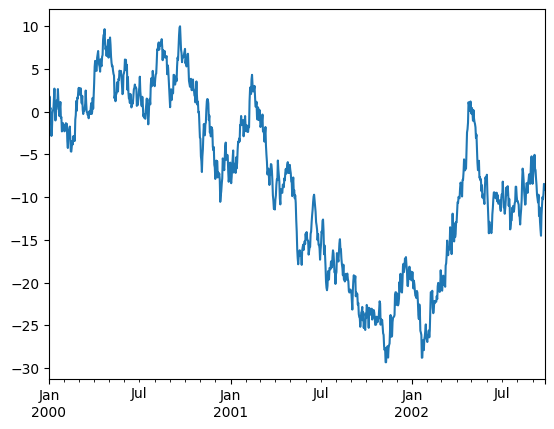

In [52]:
ts.plot()

In [53]:
# Generating a time series dataframe with multiple column labels
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)
df

,A,B,C,D
2000-01-01,0.804967,-0.224049,0.504935,1.445109
2000-01-02,-0.289406,-0.895234,-1.590560,1.334926
2000-01-03,-2.085181,-0.021021,-1.165679,0.812350
2000-01-04,-0.277488,1.617540,1.827486,-0.761164
2000-01-05,1.538090,0.246758,0.684846,-0.107307
...,...,...,...,...
2002-09-22,-0.433600,-0.771635,-1.806701,-1.488888
2002-09-23,-0.720665,-0.878716,0.788414,-0.145446
2002-09-24,1.216326,-0.583548,-0.696135,-0.417000
2002-09-25,-0.453004,-0.546994,-0.869767,-0.210877


In [54]:
df = df.cumsum()

<AxesSubplot: title={'center': 'sales_data_plot'}, xlabel='date_range', ylabel='sales'>

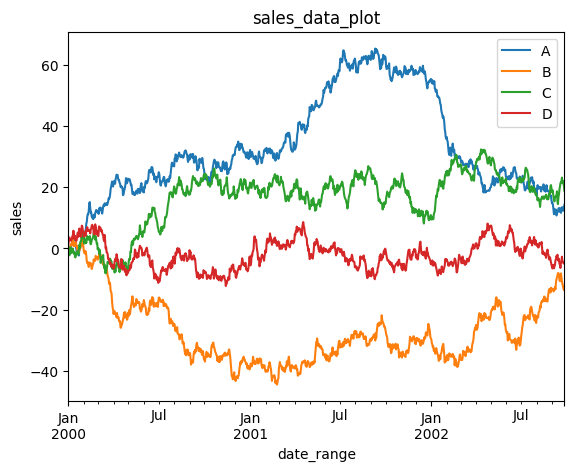

In [55]:
df.plot(xlabel='date_range', ylabel='sales', title='sales_data_plot')

## **Numpy**

[Back to contents](#table-of-contents)

### Installation

### Usage

## **Matplotlib**

[Back to contents](#table-of-contents)

### Installation

### Usage

## **Plotly**

[Back to contents](#table-of-contents)

### Installation

### Usage